Generating 5000 random configurations to simulate in COMSOL

| Zhu Paper Term | COMSOL Parameter  |
| -------------- | ----------------- |
| HTE            | LHT               |
| Wp             | w\_p              |
| Wn             | w\_n              |
| HIC            | HIC               |
| FF             | FF                |
| ρc             | rho\_c            |
| Th             | Th                |


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

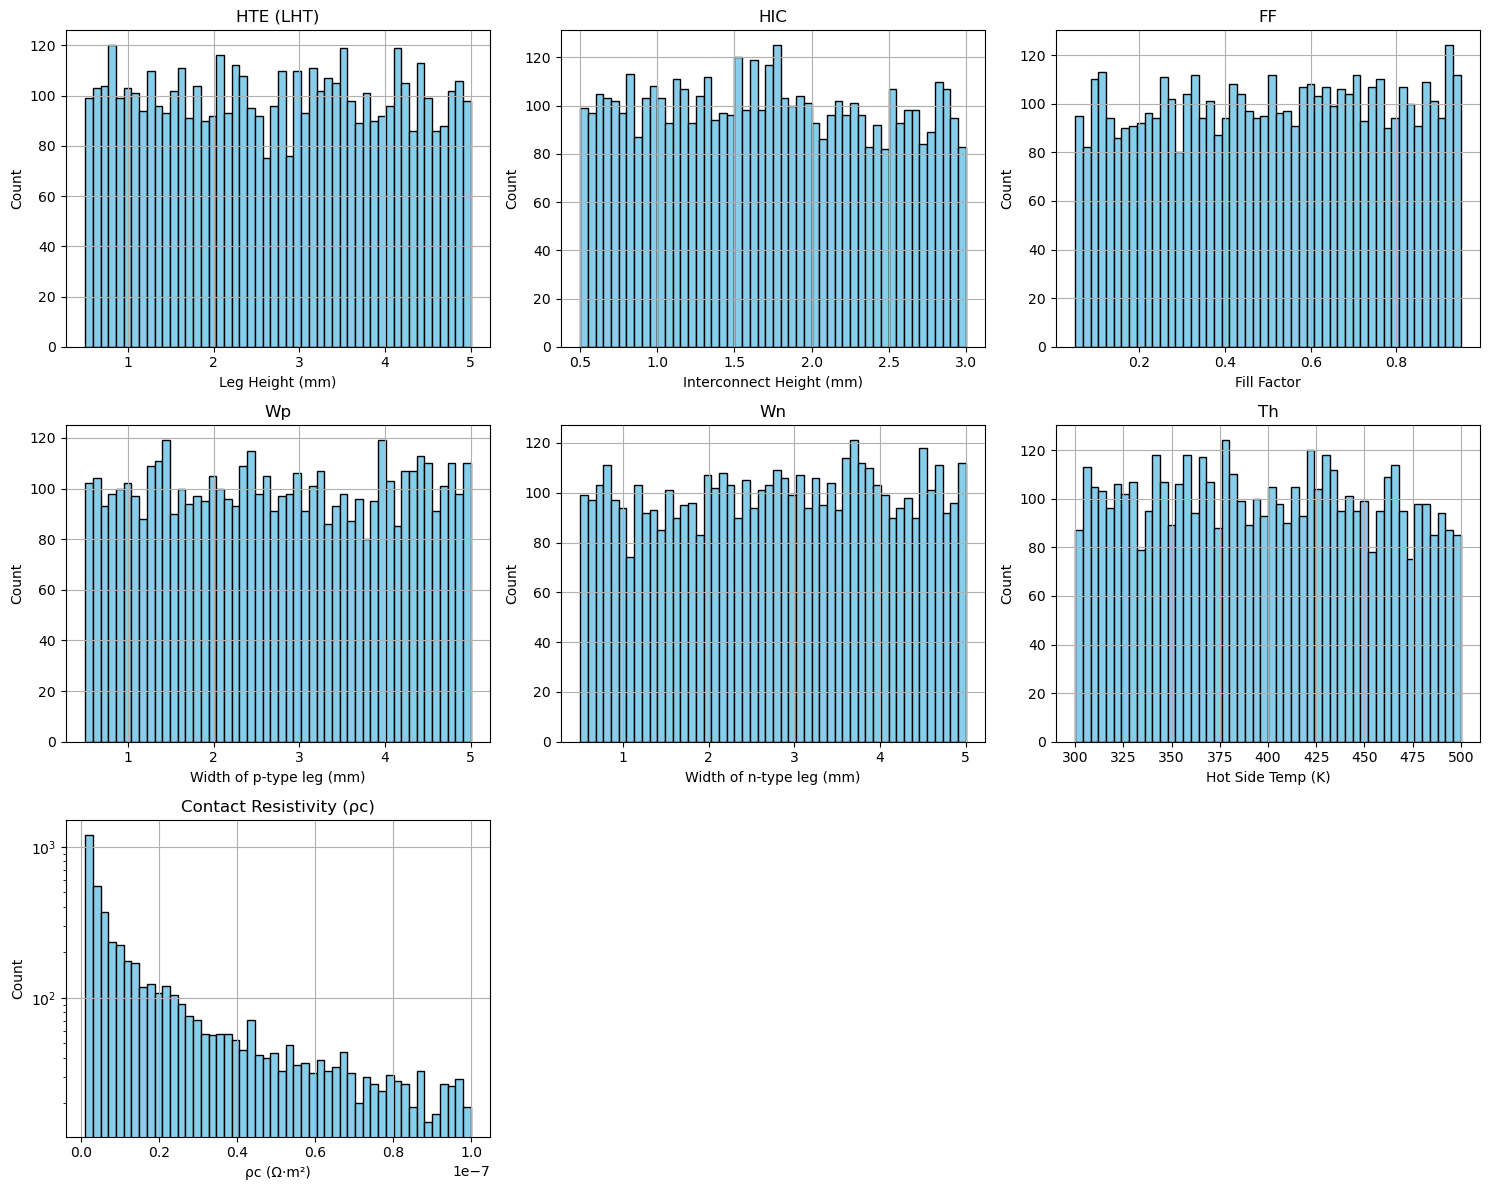

✔ CSV saved: teg_param_sweep_5000.csv


In [9]:
# Set seed for reproducibility
np.random.seed(42)

# Number of samples
N = 5000

# Uniform sampling
LHT = np.random.uniform(0.5, 5.0, N)
HIC = np.random.uniform(0.5, 3.0, N)
w_p = np.random.uniform(0.5, 5.0, N)
w_n = np.random.uniform(0.5, 5.0, N)
FF = np.random.uniform(0.05, 0.95, N)
Th = np.random.uniform(300, 500, N)

# Log-uniform for contact resistivity
log_rho_c = np.random.uniform(np.log10(1e-9), np.log10(1e-7), N)
rho_c = 10 ** log_rho_c

# Plotting function
def plot_hist(data, title, xlabel, log=False, bins=50):
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black', log=log)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(True)

# Create subplots like Zhu's Fig. S1
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
plot_hist(LHT, 'HTE (LHT)', 'Leg Height (mm)')

plt.subplot(3, 3, 2)
plot_hist(HIC, 'HIC', 'Interconnect Height (mm)')

plt.subplot(3, 3, 3)
plot_hist(FF, 'FF', 'Fill Factor')

plt.subplot(3, 3, 4)
plot_hist(w_p, 'Wp', 'Width of p-type leg (mm)')

plt.subplot(3, 3, 5)
plot_hist(w_n, 'Wn', 'Width of n-type leg (mm)')

plt.subplot(3, 3, 6)
plot_hist(Th, 'Th', 'Hot Side Temp (K)')

plt.subplot(3, 3, 7)
plot_hist(rho_c, 'Contact Resistivity (ρc)', 'ρc (Ω·m²)', log=True)

plt.tight_layout()
plt.savefig("teg_parameter_distributions.png", dpi=300)
plt.show()

#Save in COMSOL format (parameter names in first column)
param_dict = {
    'LHT': LHT,
    'HIC': HIC,
    'w_p': w_p,
    'w_n': w_n,
    'FF': FF,
    'rho_c': rho_c,
    'Th': Th
}

df = pd.DataFrame(param_dict)
df_t = df.transpose()
df_t.columns = [f"Sample_{i+1}" for i in range(N)]
df_t.insert(0, 'Parameter name', df_t.index)

# Save to CSV
df_t.to_csv('teg_param_sweep_5000.csv', index=False)
print("✔ CSV saved: teg_param_sweep_5000.csv")



In [10]:
df = pd.DataFrame(param_dict).transpose()

# Reset index so first column is parameter name
df.insert(0, 'Parameter name', df.index)

# Remove sample names — just leave values as plain columns
df.columns = ['Parameter name'] + [''] * N

# Save to CSV
df.to_csv('teg_param_sweep_5000.csv', index=False, header=False)

In [2]:
import pandas as pd

# Load the original CSV
df = pd.read_csv('teg_param_sweep_5000.csv', header=None)

# Keep the first 4 columns (i.e., LHT, w_p, w_n, HIC)
df_trimmed = df.iloc[:, :4]  # assuming each row is a parameter

# Re-export as test CSV
df_trimmed.to_csv('teg_param_sweep_test.csv', index=False, header=False)